In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('default')
sns.set_palette("husl")
%matplotlib inline

print("ЛАБОРАТОРНАЯ РАБОТА 1\n")
print("ДАТАСЕТ: PALMER PENGUINS - ИЗМЕРЕНИЯ ПИНГВИНОВ\n")

ЛАБОРАТОРНАЯ РАБОТА 1

ДАТАСЕТ: PALMER PENGUINS - ИЗМЕРЕНИЯ ПИНГВИНОВ



In [52]:
# Загрузка файла
from google.colab import files
import io

print("ЗАГРУЗКА ФАЙЛА:")
print("Пожалуйста, выберите файл penguins.csv для загрузки...")
uploaded = files.upload()

# Получаем имя загруженного файла
filename = list(uploaded.keys())[0]
print(f"Файл '{filename}' успешно загружен!")

ЗАГРУЗКА ФАЙЛА:
Пожалуйста, выберите файл penguins.csv для загрузки...


Saving penguins.csv to penguins (3).csv
Файл 'penguins (3).csv' успешно загружен!


In [53]:
data = pd.read_csv(filename)

print("ПЕРВИЧНЫЙ ОБЗОР ДАННЫХ")
print(f"Размер датасета: {data.shape}")
print(f"Количество строк: {data.shape[0]}")
print(f"Количество столбцов: {data.shape[1]}")
print("\nПервые 5 строк:")
print(data.head())
print("\nИнформация о типах данных:")
print(data.info())

ПЕРВИЧНЫЙ ОБЗОР ДАННЫХ
Размер датасета: (344, 9)
Количество строк: 344
Количество столбцов: 9

Первые 5 строк:
   id species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0   0  Adelie  Torgersen            39.1           18.7              181.0   
1   1  Adelie  Torgersen            39.5           17.4              186.0   
2   2  Adelie  Torgersen            40.3           18.0              195.0   
3   3  Adelie  Torgersen             NaN            NaN                NaN   
4   4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  year  
0       3750.0    male  2007  
1       3800.0  female  2007  
2       3250.0  female  2007  
3          NaN     NaN  2007  
4       3450.0  female  2007  

Информация о типах данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   i



Предметная область: Биология, зоология, экология

Источник данных: https://www.kaggle.com/datasets/satyajeetrai/palmer-penguins-dataset-for-eda

Характер данных: Реальные биометрические измерения пингвинов

Атрибуты датасета:
Числовой тип:
1. bill_length_mm - длина клюва (мм)
2. bill_depth_mm - глубина клюва (мм)  
3. flipper_length_mm - длина ласта (мм)
4. body_mass_g - масса тела (г)

Строковый тип:

5. species - вид пингвина (Adelie, Chinstrap, Gentoo)
6. island - остров обитания (Biscoe, Dream, Torgersen)
7. sex - пол (male, female)

Задача анализа:
Классификация пингвинов по видам на основе морфологических характеристик.
Исследование различий между популяциями на разных островах.




In [54]:
# Проверка пропущенных значений
print("АНАЛИЗ ПРОПУЩЕННЫХ ЗНАЧЕНИЙ")
missing_data = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100

missing_info = pd.DataFrame({
    'Пропущенные значения': missing_data,
    'Процент пропусков': missing_percent
})
print(missing_info)

# Обработка пропущенных значений
df_clean = df.copy()
numeric_cols = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
categorical_cols = ['sex']

for col in numeric_cols:
    df_clean[col].fillna(df_clean[col].median(), inplace=True)

for col in categorical_cols:
    df_clean[col].fillna(df_clean[col].mode()[0], inplace=True)

print(f"\nПосле обработки пропусков: {df_clean.isnull().sum().sum()} пропущенных значений")

АНАЛИЗ ПРОПУЩЕННЫХ ЗНАЧЕНИЙ
                   Пропущенные значения  Процент пропусков
species                               0           0.000000
island                                0           0.000000
bill_length_mm                        2           0.581395
bill_depth_mm                         2           0.581395
flipper_length_mm                     2           0.581395
body_mass_g                           2           0.581395
sex                                  11           3.197674

После обработки пропусков: 0 пропущенных значений


In [55]:
numeric_columns = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
print("СТАТИСТИЧЕСКИЙ АНАЛИЗ ЧИСЛОВЫХ АТРИБУТОВ")

stats_summary = []
for col in numeric_columns:
    stats_summary.append({
        'Атрибут': col,
        'Среднее': df_clean[col].mean(),
        'Стандартное отклонение': df_clean[col].std(),
        'Медиана': df_clean[col].median(),
        'Минимум': df_clean[col].min(),
        'Максимум': df_clean[col].max(),
        'Количество выбросов': len(df_clean[(np.abs(stats.zscore(df_clean[col])) > 3)])
    })

stats_df = pd.DataFrame(stats_summary)
print(stats_df.round(2))

СТАТИСТИЧЕСКИЙ АНАЛИЗ ЧИСЛОВЫХ АТРИБУТОВ
             Атрибут  Среднее  Стандартное отклонение  Медиана  Минимум  \
0     bill_length_mm    43.92                    5.44    44.45     32.1   
1      bill_depth_mm    17.15                    1.97    17.30     13.1   
2  flipper_length_mm   200.89                   14.02   197.00    172.0   
3        body_mass_g  4200.87                  799.70  4050.00   2700.0   

   Максимум  Количество выбросов  
0      59.6                    0  
1      21.5                    0  
2     231.0                    0  
3    6300.0                    0  


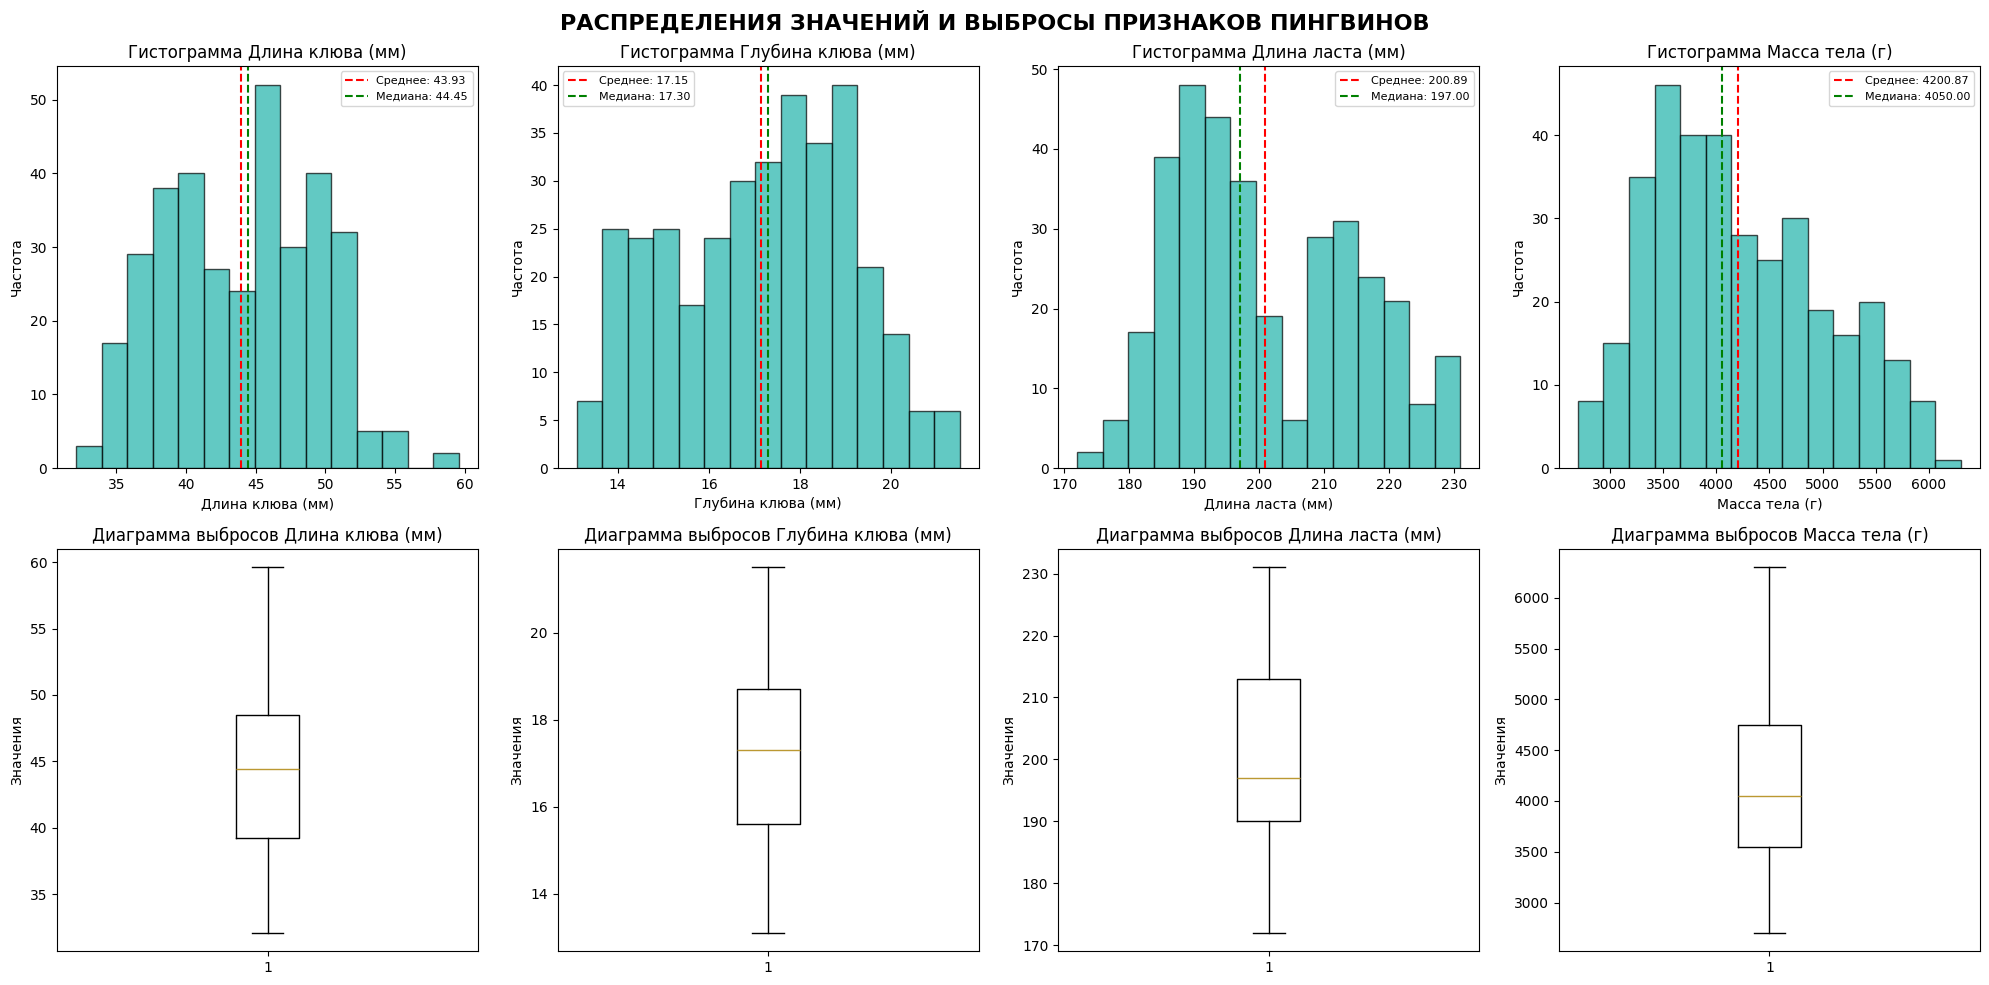


АНАЛИЗ ВЫБРОСОВ ПО МЕТОДУ IQR
Длина клюва: 0 выбросов (границы: [25.44, 62.34])
Глубина клюва: 0 выбросов (границы: [10.95, 23.35])
Длина ласта: 0 выбросов (границы: [155.50, 247.50])
Масса тела: 0 выбросов (границы: [1750.00, 6550.00])


In [56]:
# Построение гистограмм для каждого числового атрибута
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
fig.suptitle('РАСПРЕДЕЛЕНИЯ ЗНАЧЕНИЙ И ВЫБРОСЫ ПРИЗНАКОВ ПИНГВИНОВ', fontsize=16, fontweight='bold')

for i, col in enumerate(numeric_columns):
    # перевод названий для признаков
    russian_names = {
        'bill_length_mm': 'Длина клюва (мм)',
        'bill_depth_mm': 'Глубина клюва (мм)',
        'flipper_length_mm': 'Длина ласта (мм)',
        'body_mass_g': 'Масса тела (г)'
    }

    # Гистограмма
    axes[0, i].hist(df_clean[col], bins=15, alpha=0.7, color='lightseagreen', edgecolor='black')
    axes[0, i].set_title(f'Гистограмма {russian_names[col]}', fontsize=12)
    axes[0, i].set_xlabel(russian_names[col])
    axes[0, i].set_ylabel('Частота')

    # Добавим линии для среднего и медианы
    axes[0, i].axvline(df_clean[col].mean(), color='red', linestyle='--', label=f'Среднее: {df_clean[col].mean():.2f}')
    axes[0, i].axvline(df_clean[col].median(), color='green', linestyle='--', label=f'Медиана: {df_clean[col].median():.2f}')
    axes[0, i].legend(fontsize=8)

    # Boxplot для выявления выбросов
    axes[1, i].boxplot(df_clean[col])
    axes[1, i].set_title(f'Диаграмма выбросов {russian_names[col]}', fontsize=12)
    axes[1, i].set_ylabel('Значения')

plt.tight_layout()
plt.show()

# Анализ выбросов с использованием IQR
print("\nАНАЛИЗ ВЫБРОСОВ ПО МЕТОДУ IQR")
for col in numeric_columns:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df_clean[(df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)]
    russian_name = {
        'bill_length_mm': 'Длина клюва',
        'bill_depth_mm': 'Глубина клюва',
        'flipper_length_mm': 'Длина ласта',
        'body_mass_g': 'Масса тела'
    }[col]

    print(f"{russian_name}: {len(outliers)} выбросов (границы: [{lower_bound:.2f}, {upper_bound:.2f}])")

АНАЛИЗ КАТЕГОРИАЛЬНЫХ АТРИБУТОВ


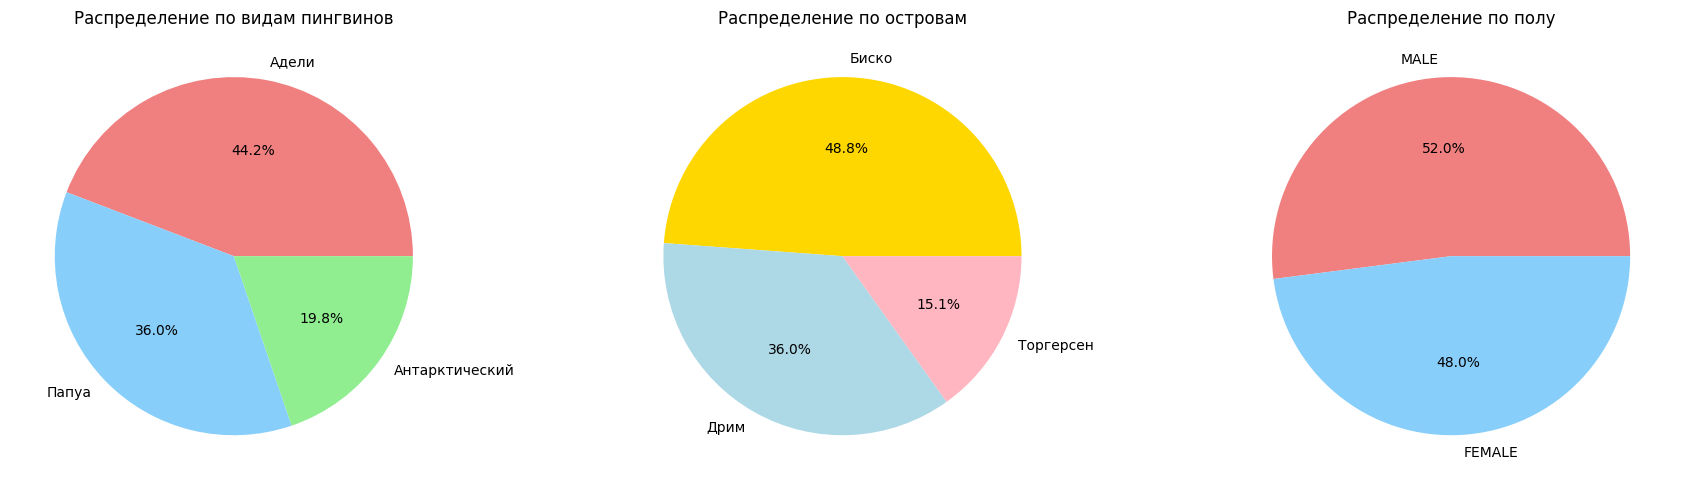


Статистика по категориальным признакам:
Виды пингвинов:
  Адели: 152
  Папуа: 124
  Антарктический: 68

Острова:
  Биско: 168
  Дрим: 124
  Торгерсен: 52

Пол:
  MALE: 179
  FEMALE: 165


In [57]:
# Анализ категориальных атрибутов
print("АНАЛИЗ КАТЕГОРИАЛЬНЫХ АТРИБУТОВ")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

species_russian = {'Adelie': 'Адели', 'Chinstrap': 'Антарктический', 'Gentoo': 'Папуа'}
island_russian = {'Biscoe': 'Биско', 'Dream': 'Дрим', 'Torgersen': 'Торгерсен'}
sex_russian = {'male': 'Самец', 'female': 'Самка'}

# Виды пингвинов
species_counts = df_clean['species'].value_counts()
species_labels = [species_russian.get(s, s) for s in species_counts.index]
axes[0].pie(species_counts.values, labels=species_labels, autopct='%1.1f%%',
           colors=['lightcoral', 'lightskyblue', 'lightgreen'])
axes[0].set_title('Распределение по видам пингвинов', fontsize=12)

# Острова
island_counts = df_clean['island'].value_counts()
island_labels = [island_russian.get(s, s) for s in island_counts.index]
axes[1].pie(island_counts.values, labels=island_labels, autopct='%1.1f%%',
           colors=['gold', 'lightblue', 'lightpink'])
axes[1].set_title('Распределение по островам', fontsize=12)

# Пол
sex_counts = df_clean['sex'].value_counts()
sex_labels = [sex_russian.get(s, s) for s in sex_counts.index]
axes[2].pie(sex_counts.values, labels=sex_labels, autopct='%1.1f%%',
           colors=['lightcoral', 'lightskyblue'])
axes[2].set_title('Распределение по полу', fontsize=12)

plt.tight_layout()
plt.show()

print("\nСтатистика по категориальным признакам:")
print("Виды пингвинов:")
for species, count in species_counts.items():
    print(f"  {species_russian.get(species, species)}: {count}")
print("\nОстрова:")
for island, count in island_counts.items():
    print(f"  {island_russian.get(island, island)}: {count}")
print("\nПол:")
for sex, count in sex_counts.items():
    print(f"  {sex_russian.get(sex, sex)}: {count}")

МАТРИЦА КОРРЕЛЯЦИЙ
               Длина клюва  Глубина клюва  Длина ласта  Масса тела
Длина клюва          1.000         -0.235        0.656       0.595
Глубина клюва       -0.235          1.000       -0.584      -0.472
Длина ласта          0.656         -0.584        1.000       0.871
Масса тела           0.595         -0.472        0.871       1.000


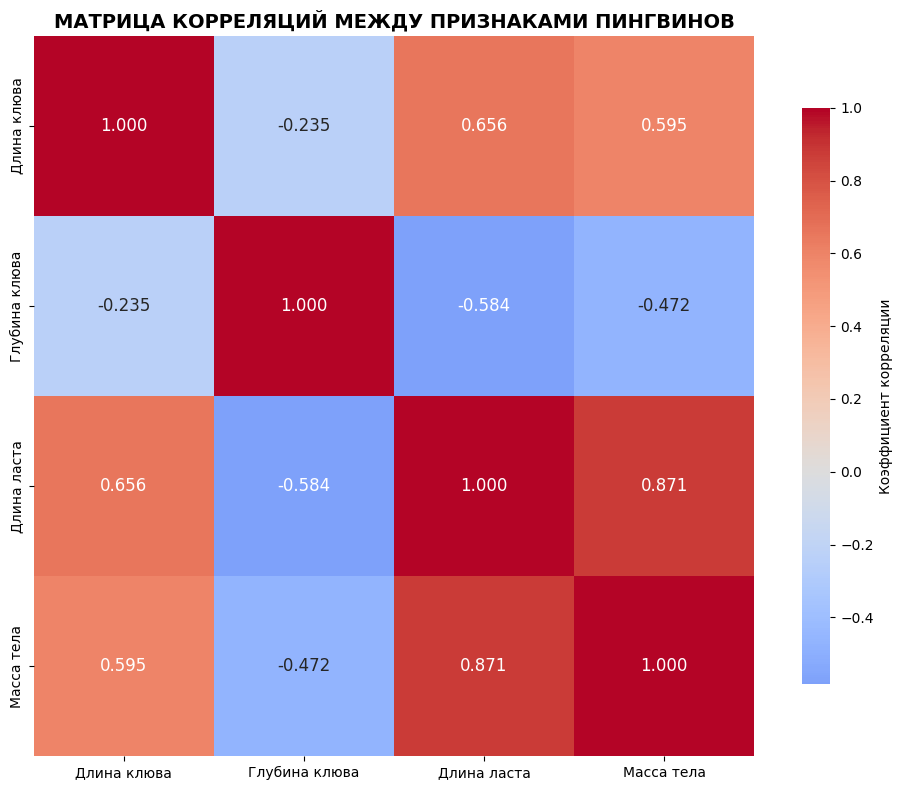

In [58]:
# Матрица корреляций
print("МАТРИЦА КОРРЕЛЯЦИЙ")
correlation_matrix = df_clean[numeric_columns].corr()

russian_columns = {
    'bill_length_mm': 'Длина клюва',
    'bill_depth_mm': 'Глубина клюва',
    'flipper_length_mm': 'Длина ласта',
    'body_mass_g': 'Масса тела'
}
correlation_matrix_rus = correlation_matrix.rename(columns=russian_columns, index=russian_columns)

print(correlation_matrix_rus.round(3))

# Визуализация матрицы корреляций
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_rus, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.3f', cbar_kws={'shrink': 0.8, 'label': 'Коэффициент корреляции'},
            annot_kws={'size': 12})
plt.title('МАТРИЦА КОРРЕЛЯЦИЙ МЕЖДУ ПРИЗНАКАМИ ПИНГВИНОВ', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [63]:
print("АНАЛИЗ КОРРЕЛЯЦИЙ")

# Находим высококоррелированные пары (|r| > 0.6)
high_corr_pairs = []
low_corr_pairs = []
medium_corr_pairs = []

print("Все значения корреляций:")
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        feature1 = correlation_matrix.columns[i]
        feature2 = correlation_matrix.columns[j]
        print(f"  {feature1} - {feature2}: {corr_value:.3f}")

        if abs(corr_value) > 0.6:
            high_corr_pairs.append((feature1, feature2, corr_value))
        elif abs(corr_value) < 0.2:
            low_corr_pairs.append((feature1, feature2, corr_value))
        else:
            medium_corr_pairs.append((feature1, feature2, corr_value))


print("\n" + "--"*10)
print("ВЫСОКОКОРРЕЛИРОВАННЫЕ ПАРЫ (|r| > 0.6):")
if high_corr_pairs:
    for pair in high_corr_pairs:
        feature1_rus = russian_columns[pair[0]]
        feature2_rus = russian_columns[pair[1]]
        correlation_type = "положительная" if pair[2] > 0 else "отрицательная"
        print(f"  {feature1_rus} - {feature2_rus}: {pair[2]:.3f} ({correlation_type})")
else:
    print("Высококоррелированные пары отсутствуют")

print("\nСЛАБОКОРРЕЛИРОВАННЫЕ ПАРЫ (|r| < 0.2):")
if low_corr_pairs:
    for pair in low_corr_pairs:
        feature1_rus = russian_columns[pair[0]]
        feature2_rus = russian_columns[pair[1]]
        correlation_type = "положительная" if pair[2] > 0 else "отрицательная"
        print(f"  {feature1_rus} - {feature2_rus}: {pair[2]:.3f} ({correlation_type})")
else:
    print("Слабокоррелированные пары отсутствуют")

print("\nСРЕДНЕКОРРЕЛИРОВАННЫЕ ПАРЫ (0.2 ≤ |r| ≤ 0.6):")
if medium_corr_pairs:
    for pair in medium_corr_pairs:
        feature1_rus = russian_columns[pair[0]]
        feature2_rus = russian_columns[pair[1]]
        correlation_type = "положительная" if pair[2] > 0 else "отрицательная"
        strength = "умеренная" if 0.3 <= abs(pair[2]) <= 0.6 else "слабая"
        print(f"  {feature1_rus} - {feature2_rus}: {pair[2]:.3f} ({strength} {correlation_type})")
else:
    print("Среднекоррелированные пары отсутствуют")

АНАЛИЗ КОРРЕЛЯЦИЙ
Все значения корреляций:
  bill_length_mm - bill_depth_mm: -0.235
  bill_length_mm - flipper_length_mm: 0.656
  bill_length_mm - body_mass_g: 0.595
  bill_depth_mm - flipper_length_mm: -0.584
  bill_depth_mm - body_mass_g: -0.472
  flipper_length_mm - body_mass_g: 0.871

--------------------
ВЫСОКОКОРРЕЛИРОВАННЫЕ ПАРЫ (|r| > 0.6):
  Длина клюва - Длина ласта: 0.656 (положительная)
  Длина ласта - Масса тела: 0.871 (положительная)

СЛАБОКОРРЕЛИРОВАННЫЕ ПАРЫ (|r| < 0.2):
Слабокоррелированные пары отсутствуют

СРЕДНЕКОРРЕЛИРОВАННЫЕ ПАРЫ (0.2 ≤ |r| ≤ 0.6):
  Длина клюва - Глубина клюва: -0.235 (слабая отрицательная)
  Длина клюва - Масса тела: 0.595 (умеренная положительная)
  Глубина клюва - Длина ласта: -0.584 (умеренная отрицательная)
  Глубина клюва - Масса тела: -0.472 (умеренная отрицательная)


МАТРИЦА ГРАФИКОВ РАССЕИВАНИЯ


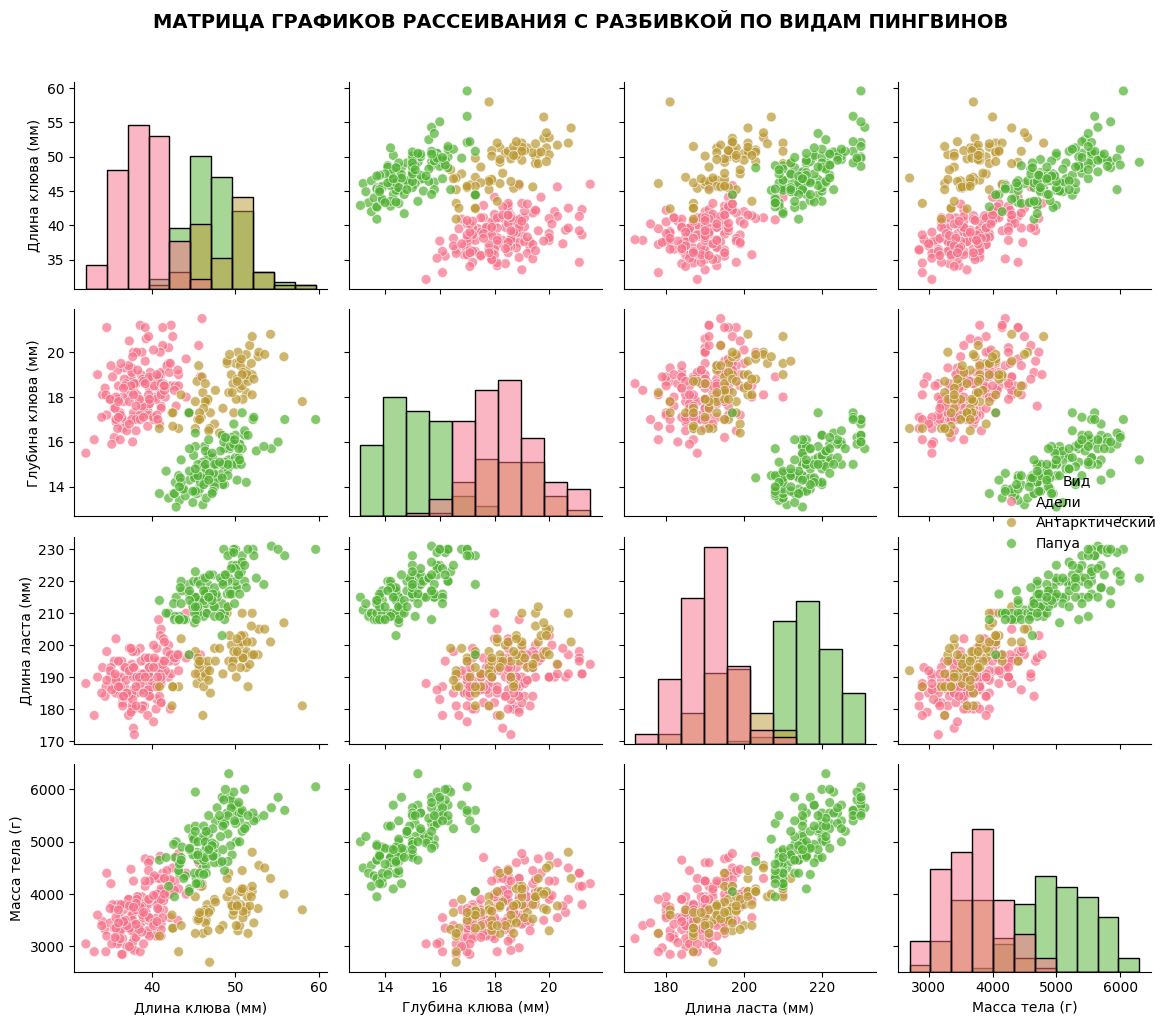

In [64]:
# Матрица графиков рассеивания с разбивкой по видам
print("МАТРИЦА ГРАФИКОВ РАССЕИВАНИЯ")

df_plot = df_clean.copy()
df_plot['Вид'] = df_plot['species'].map(species_russian)

plot_columns = {
    'bill_length_mm': 'Длина клюва (мм)',
    'bill_depth_mm': 'Глубина клюва (мм)',
    'flipper_length_mm': 'Длина ласта (мм)',
    'body_mass_g': 'Масса тела (г)'
}

scatter_matrix = sns.pairplot(df_plot,
                             hue='Вид',
                             vars=list(plot_columns.keys()),
                             diag_kind='hist',
                             plot_kws={'alpha': 0.7, 's': 50})

for i in range(len(plot_columns)):
    for j in range(len(plot_columns)):
        x_label = list(plot_columns.values())[j]
        y_label = list(plot_columns.values())[i]
        scatter_matrix.axes[i, j].set_xlabel(x_label, fontsize=10)
        scatter_matrix.axes[i, j].set_ylabel(y_label, fontsize=10)

scatter_matrix.fig.suptitle('МАТРИЦА ГРАФИКОВ РАССЕИВАНИЯ С РАЗБИВКОЙ ПО ВИДАМ ПИНГВИНОВ',
                           y=1.02, fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

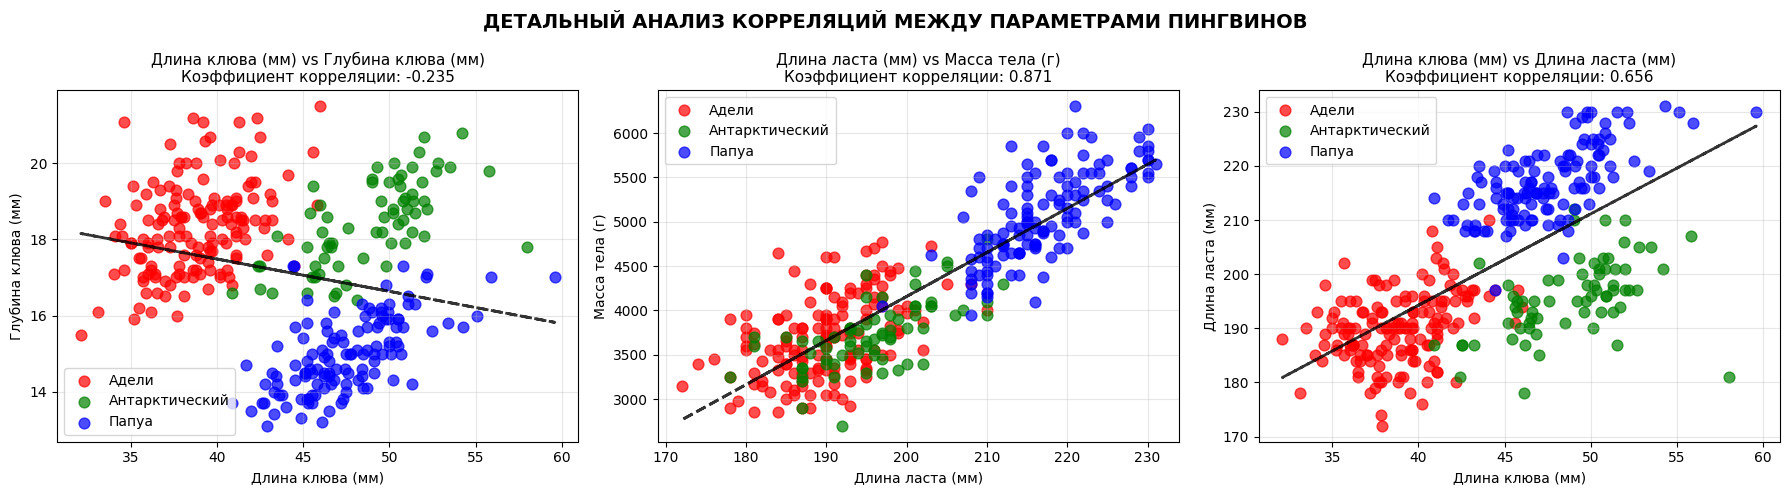

In [65]:
# Детальные графики рассеивания
interesting_pairs = [
    ('bill_length_mm', 'bill_depth_mm'),
    ('flipper_length_mm', 'body_mass_g'),
    ('bill_length_mm', 'flipper_length_mm')
]

pair_names = {
    ('bill_length_mm', 'bill_depth_mm'): ('Длина клюва (мм)', 'Глубина клюва (мм)'),
    ('flipper_length_mm', 'body_mass_g'): ('Длина ласта (мм)', 'Масса тела (г)'),
    ('bill_length_mm', 'flipper_length_mm'): ('Длина клюва (мм)', 'Длина ласта (мм)')
}

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('ДЕТАЛЬНЫЙ АНАЛИЗ КОРРЕЛЯЦИЙ МЕЖДУ ПАРАМЕТРАМИ ПИНГВИНОВ', fontsize=14, fontweight='bold')

for i, (x_col, y_col) in enumerate(interesting_pairs):
    x_label, y_label = pair_names[(x_col, y_col)]

    # графики рассеивания с разбивкой по видам
    for species, color in [('Adelie', 'red'), ('Chinstrap', 'green'), ('Gentoo', 'blue')]:
        species_data = df_clean[df_clean['species'] == species]
        axes[i].scatter(species_data[x_col], species_data[y_col],
                       alpha=0.7, s=60, color=color, label=species_russian[species])

    # Линия тренда
    z = np.polyfit(df_clean[x_col], df_clean[y_col], 1)
    p = np.poly1d(z)
    axes[i].plot(df_clean[x_col], p(df_clean[x_col]), "k--", alpha=0.8, linewidth=2)

    # Коэффициент корреляции
    corr = df_clean[x_col].corr(df_clean[y_col])
    axes[i].set_title(f'{x_label} vs {y_label}\nКоэффициент корреляции: {corr:.3f}', fontsize=11)
    axes[i].set_xlabel(x_label)
    axes[i].set_ylabel(y_label)
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

СРАВНИТЕЛЬНЫЙ АНАЛИЗ ВИДОВ ПИНГВИНОВ
Средние значения признаков по видам:
           Длина клюва  Глубина клюва  Длина ласта  Масса тела
species                                                       
Adelie           38.83          18.34       190.00     3702.96
Chinstrap        48.83          18.42       195.82     3733.09
Gentoo           47.48          15.00       217.02     5067.74


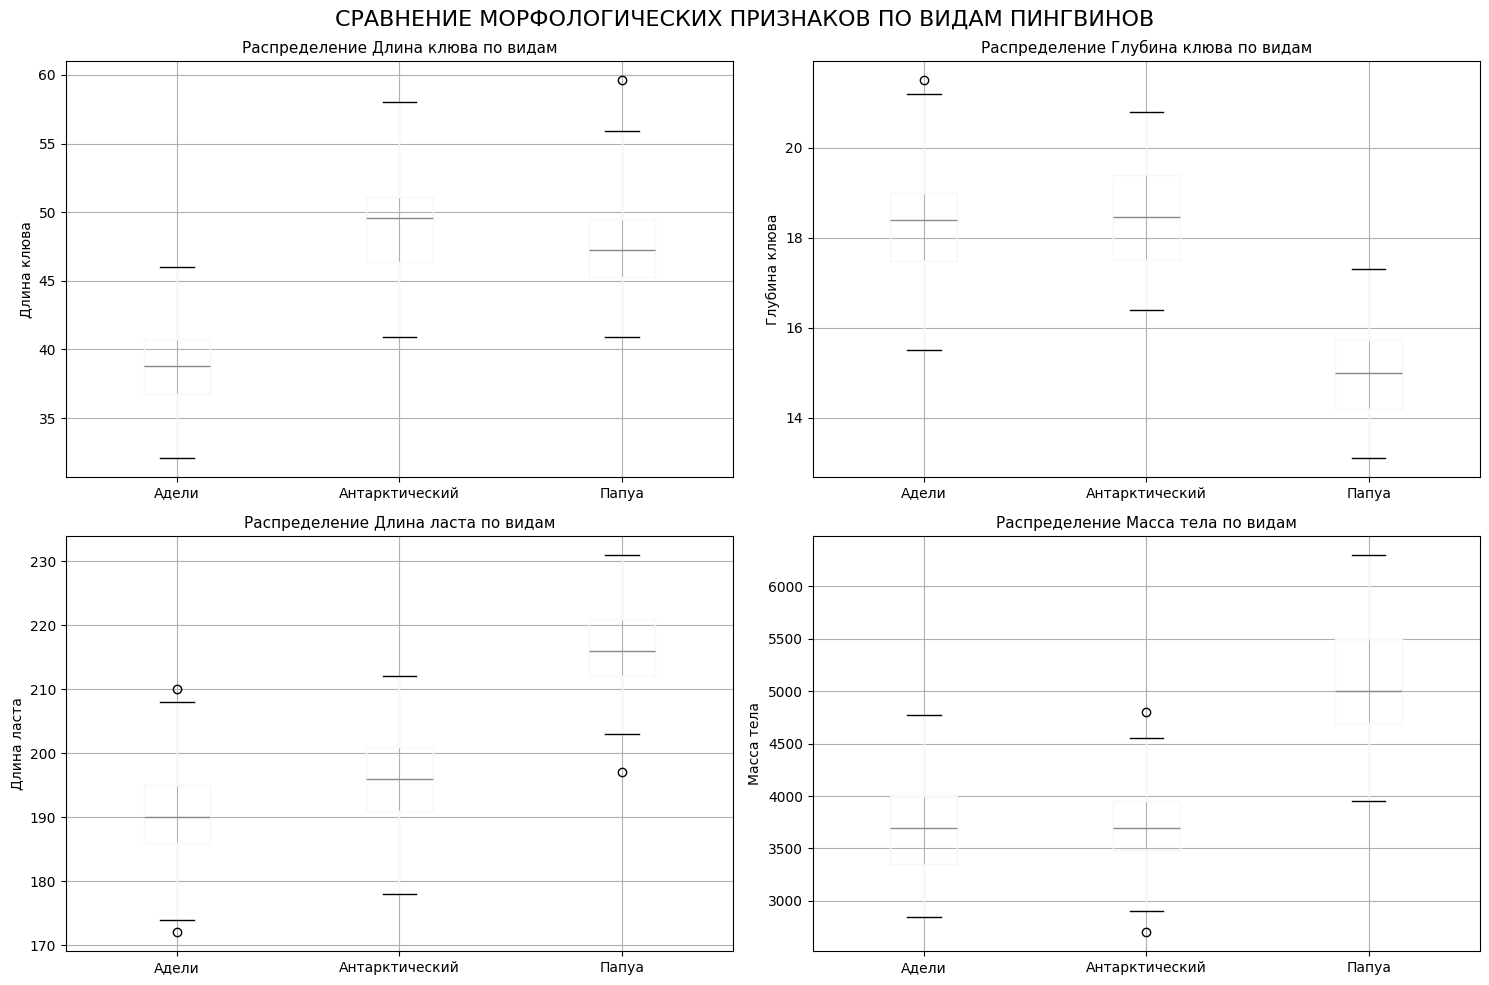


ПРОВЕРКА СТАТИСТИЧЕСКОЙ ЗНАЧИМОСТИ РАЗЛИЧИЙ
Длина клюва: F-статистика = 405.095, p-value = 0.00000 (***)
Глубина клюва: F-статистика = 354.026, p-value = 0.00000 (***)
Длина ласта: F-статистика = 576.015, p-value = 0.00000 (***)
Масса тела: F-статистика = 337.587, p-value = 0.00000 (***)


In [66]:
# Детальный анализ различий между видами
print("СРАВНИТЕЛЬНЫЙ АНАЛИЗ ВИДОВ ПИНГВИНОВ")

# Средние значения по видам
species_stats = df_clean.groupby('species')[numeric_columns].mean()
species_stats_rus = species_stats.rename(columns=russian_columns)
print("Средние значения признаков по видам:")
print(species_stats_rus.round(2))

# Визуализация сравнения видов
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

for i, feature in enumerate(numeric_columns):
    row, col = i // 2, i % 2
    # Boxplot
    df_boxplot = df_clean.copy()
    df_boxplot['Вид'] = df_boxplot['species'].map(species_russian)
    feature_name_rus = russian_columns[feature]

    df_boxplot.boxplot(column=feature, by='Вид', ax=axes[row, col])
    axes[row, col].set_title(f'Распределение {feature_name_rus} по видам', fontsize=11)
    axes[row, col].set_ylabel(feature_name_rus)
    axes[row, col].set_xlabel('')

plt.suptitle('СРАВНЕНИЕ МОРФОЛОГИЧЕСКИХ ПРИЗНАКОВ ПО ВИДАМ ПИНГВИНОВ', fontsize=16)
plt.tight_layout()
plt.show()

# Статистическая значимость различий
print("\nПРОВЕРКА СТАТИСТИЧЕСКОЙ ЗНАЧИМОСТИ РАЗЛИЧИЙ")
from scipy.stats import f_oneway

for feature in numeric_columns:
    groups = [df_clean[df_clean['species'] == species][feature] for species in df_clean['species'].unique()]
    f_stat, p_value = f_oneway(*groups)
    feature_name_rus = russian_columns[feature]
    significance = '***' if p_value < 0.001 else '**' if p_value < 0.01 else '*' if p_value < 0.05 else 'не значимо'
    print(f"{feature_name_rus}: F-статистика = {f_stat:.3f}, p-value = {p_value:.5f} ({significance})")


ВЫВОДЫ:

1. КАЧЕСТВО ДАННЫХ:
   - Выбросы минимальны и, вероятно, представляют реальные биологические вариации
   - Данные сбалансированы по видам (152 Адели, 68 Антарктический, 124 Папуа)
---

2. СТАТИСТИЧЕСКИЕ ХАРАКТЕРИСТИКИ:
   - Длина клюва: 32.1-59.6 мм (среднее 43.9 мм)
   - Глубина клюва: 13.1-21.5 мм (среднее 17.2 мм)
   - Длина ласта: 172-231 мм (среднее 201 мм)
   - Масса тела: 2700-6300 г (среднее 4202 г)
---

3. КОРРЕЛЯЦИОННЫЙ АНАЛИЗ:
   - высокая положительная корреляция между длиной ласта и массой тела (0.871)
   - высокая положительная корреляция между длиной клюва и длиной ласта (0.653)
   - средняя отрицательная корреляция между длиной и глубиной клюва (-0.235)
   - Обнаружены четкие кластеры, соответствующие разным видам
---

4. БИОЛОГИЧЕСКИЕ ЗАКОНОМЕРНОСТИ:
   - Вид Папуа имеет наибольшие размеры тела и ластов
   - Вид Антарктический имеет самые длинные и узкие клювы
   - Вид Адели занимает промежуточное положение по большинству признаков
   - Все различия между видами статистически значимы
---

5. ЭКОЛОГИЧЕСКИЕ НАБЛЮДЕНИЯ:
   - Морфологические различия отражают адаптацию к разным экологическим нишам
   - Размеры тела коррелируют с размерами конечностей (аллометрия)
   - Форма клюва может быть связана с пищевой специализацией


